In [54]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing, linear_model, model_selection, metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [58]:
df = pd.read_csv(os.path.join('..', 'TitanicProject', 'titanic-train.csv'))

In [5]:
df

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C,1302
1,17,0,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,S,17
2,1049,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,1049
3,388,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S,388
4,1060,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,S,1060
5,328,0,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,C,328
6,729,1,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,C,729
7,552,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,552
8,296,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,S,296
9,1257,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,S,1257


In [76]:
df[df.Pclass == 3 ].mean()

Unnamed: 0     658.464286
Survived         0.254202
Pclass           3.000000
Age             25.711309
SibSp            0.533613
Parch            0.380252
Fare            12.947552
PassengerId    658.464286
dtype: float64

In [8]:
df.corr()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
Unnamed: 0,1.000000,0.006311,0.025241,0.020005,0.001659,0.019943,-0.028013,1.000000
Survived,0.006311,1.000000,-0.338951,-0.034977,-0.012812,0.107791,0.257220,0.006311
Pclass,0.025241,-0.338951,1.000000,-0.377474,0.064589,0.000924,-0.557365,0.025241
Age,0.020005,-0.034977,-0.377474,1.000000,-0.262496,-0.161495,0.139542,0.020005
SibSp,0.001659,-0.012812,0.064589,-0.262496,1.000000,0.358425,0.136756,0.001659
Parch,0.019943,0.107791,0.000924,-0.161495,0.358425,1.000000,0.189630,0.019943
Fare,-0.028013,0.257220,-0.557365,0.139542,0.136756,0.189630,1.000000,-0.028013
PassengerId,1.000000,0.006311,0.025241,0.020005,0.001659,0.019943,-0.028013,1.000000


In [15]:
df.describe()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
count,873.000000,873.000000,873.000000,701.000000,873.000000,873.000000,872.000000,873.000000
mean,648.357388,0.392898,2.300115,29.560747,0.469645,0.387171,32.368950,648.357388
std,377.179578,0.488674,0.837325,14.255972,0.932003,0.831667,50.535715,377.179578
min,1.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,322.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,322.000000
50%,638.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.479150,638.000000
75%,972.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.017700,972.000000
max,1307.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1307.000000


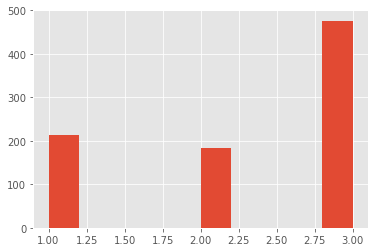

In [20]:
df.Pclass.hist()

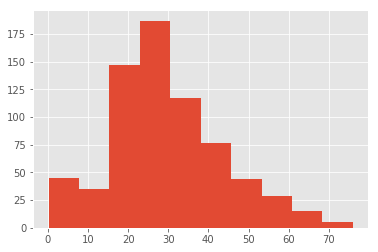

In [21]:
df.Age.hist()

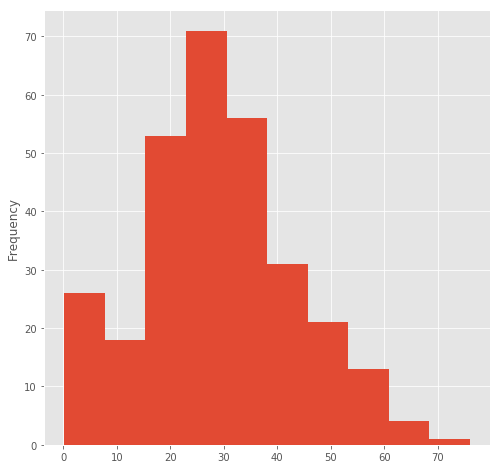

In [26]:
df.Age[df.Survived==1].plot(kind = 'hist', figsize = (8, 8))

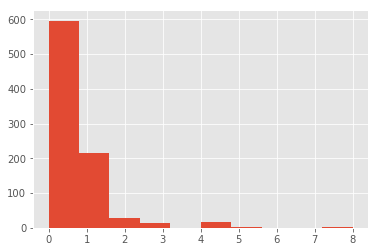

In [22]:
df.SibSp.hist()

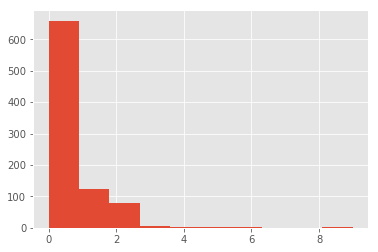

In [23]:
df.Parch.hist()

In [46]:
pclass_df = pd.get_dummies(df.Pclass, prefix = 'Pclass')
sex_df = pd.get_dummies(df.Sex, prefix = 'Sex')
embk_df = pd.get_dummies(df.Embarked, prefix = 'Embk')
df = df.join([pclass_df, sex_df, embk_df])

In [50]:
df

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,...,Pclass_3,Sex_female,Sex_male,Embk_C,Embk_Q,Embk_S
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,...,0,1,0,1,0,0
1,17,0,3,"van Billiard, Master. Walter John",male,11.5,...,1,0,1,0,0,1
2,1049,1,1,"Frauenthal, Dr. Henry William",male,50.0,...,0,0,1,0,0,1
3,388,1,3,"Stranden, Mr. Juho",male,31.0,...,1,0,1,0,0,1
4,1060,1,2,"Davis, Miss. Mary",female,28.0,...,0,1,0,0,0,1
5,328,0,2,"Stanton, Mr. Samuel Ward",male,41.0,...,0,0,1,1,0,0
6,729,1,3,"Karun, Mr. Franz",male,39.0,...,1,0,1,1,0,0
7,552,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,...,1,0,1,0,0,1
8,296,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,...,1,1,0,0,0,1
9,1257,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,...,1,0,1,0,0,1


In [52]:
df.SibSp = df.SibSp.apply(lambda value: 0 if value == 0 else 1)

In [53]:
df.Parch = df.Parch.apply(lambda value: 0 if value == 0 else 1)

In [59]:
df.Age = df.Age.fillna(df.Age.median())

In [60]:
df.isnull().sum()

Unnamed: 0     0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
PassengerId    0
dtype: int64

In [64]:
df.Survived

0      1
1      0
2      1
3      1
4      1
5      0
6      1
7      0
8      0
9      0
      ..
863    0
864    0
865    1
866    0
867    0
868    0
869    0
870    1
871    1
872    0
Name: Survived, dtype: int64